# ex2.1 jack's car rental solving

Goal:

- implementing value iteration in dynamic programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## copy the code from ex2.0 here

Note: numba's jit could compile python's code to near native performance. If you can use it without problems, good for you, if not, just remove the line `@jit(nopython=True)`.

In [3]:
import numpy as np
from scipy.stats import poisson
from numba import jit

N_CARS = 20

# renting and returning propabilities
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 3)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 2)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)

@jit(nopython=True)
def step_rent(n_car, p):
    # code here ...
    """return probability distribution over the number of cars after rent"""
    pp = np.zeros(N_CARS + 1)
    r = 0.
    for i_rent in range(0, N_CARS + 1):
        _p = p[i_rent]
        i_rent = min(n_car, i_rent)
        r += _p * 10. * i_rent
        pp[n_car - i_rent] += _p
    return pp, r

@jit(nopython=True)
def step_return(p_car, p):
    # code here ...
    """return a distribution over the number of cars aftern returned"""
    pp = np.zeros(N_CARS + 1)
    for n_car in range(0, N_CARS + 1):
        for i_ret in range(0, N_CARS + 1):
            nn_car = min(n_car + i_ret, N_CARS)
            pp[nn_car] += p_car[n_car] * p[i_ret]
    return pp


def step_rent_return(n_car, p_rent, p_return):
    # code here ...
    p, r = step_rent(n_car, p_rent)
    p = step_return(p, p_return)
    return p, r


def step_env(s, a):
    """step a on state s, returning the next state distribution and the expected reward"""
    # code here ...
    # move cars
    n_a, n_b = s
    n_a -= a
    n_b += a
    r_move = -2 * abs(a)
    # renting and returning
    p_a, r_a = step_rent_return(n_a, P_RENT_A, P_RETURN_A)
    p_b, r_b = step_rent_return(n_b, P_RENT_B, P_RETURN_B)
    p = np.outer(p_a, p_b)
    r = r_move + r_a + r_b
    return p, r


# value iteration

implement the value iteration to solve this Jack's car rental problem.

In [6]:
def valid_a(s):
    # note: this function is not given
    """you can move at most -5 to 5 cars per night"""
    n_a, n_b = s
    a = []
    for i in range(-5, 6):
        if 0 <= n_a - i <= N_CARS and 0 <= n_b + i <= N_CARS: a.append(i)
    return a

def value_itr(v, thresh=1e-4):
    # code here ...
    while True:
        change = 0.
        for n_a in range(0, N_CARS+1):
            for n_b in range(0, N_CARS+1):
                s = (n_a, n_b)
                x = [0]
                for a in valid_a(s):
                    p, r = step_env(s, a)
                    x.append(r + 0.9 * (v * p).sum())
                new_v = max(x)
                change = max(change, abs(new_v - v[s]))
                v[s] = new_v
                
        print('change:', change)
        if change < thresh:
            break


## verify the solution value

change: 246.74075548520187
change: 155.48312675033273
change: 93.42747837803023
change: 66.28109753748751
change: 50.046989765331034
change: 38.610754075476905
change: 31.326655237724083
change: 25.757458251955825
change: 21.132510939931308
change: 17.318241468994188
change: 14.183327892655086
change: 11.613249138859146
change: 9.508219189034378
change: 7.784252298612216
change: 6.372796511401532
change: 5.217436419806575
change: 4.271581559667254
change: 3.497247613991192
change: 2.8633616960318022
change: 2.3444375004120275
change: 1.919604817445986
change: 1.5717859839733137
change: 1.2870086780064867
change: 1.0538427888984643
change: 0.8629351647009003
change: 0.7066243723030539
change: 0.5786360662228844
change: 0.47383724138791194
change: 0.388025170809442
change: 0.31775857572790756
change: 0.26021971821336365
change: 0.21310178768555943
change: 0.17451651943321167
change: 0.14291820616762152
change: 0.11704140633469251
change: 0.09585000831935986
change: 0.07849559455394228
ch

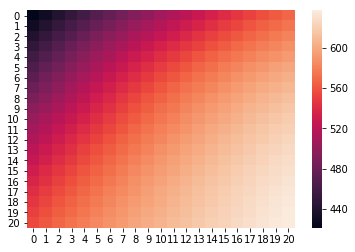

In [7]:
v = np.zeros((N_CARS+1, N_CARS+1))
value_itr(v)
print(v.min(), v.max())
sns.heatmap(v)

Expected result:

421.4136554821914 636.9894057704319

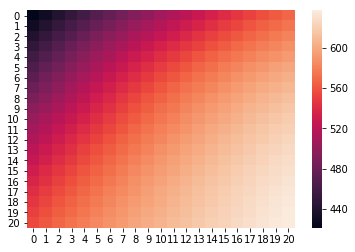

# show the greedy policy

In [8]:
def greedy(v):
    pi = np.zeros((N_CARS+1, N_CARS+1))
    for n_a in range(0, N_CARS+1):
        for n_b in range(0, N_CARS+1):
            s = (n_a, n_b)
            x = [0]
            act = [0]
            for a in valid_a(s):
                p, r = step_env(s, a)
                x.append(r + 0.9 * (v * p).sum())
                act.append(a)
            pi[s] = act[np.argmax(x)]
    return pi

## verify the greedy solution policy

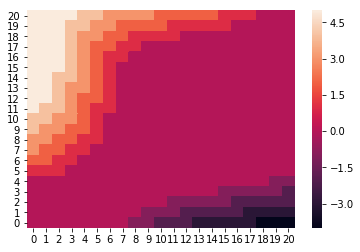

In [9]:
pi = greedy(v)
sns.heatmap(pi[::-1], xticklabels=range(N_CARS+1), yticklabels=list(reversed(range(N_CARS+1))))

Expected result:

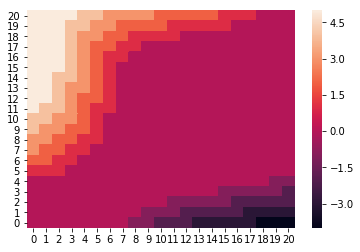

# If we change the renting and returning probabilities like the following:

In [67]:
P_RETURN_A = poisson.pmf(np.arange(0, N_CARS + 1), 0)
P_RENT_A = poisson.pmf(np.arange(0, N_CARS + 1), 4)
P_RETURN_B = poisson.pmf(np.arange(0, N_CARS + 1), 4)
P_RENT_B = poisson.pmf(np.arange(0, N_CARS + 1), 0)

## Q: what is an expected behavior?

Describe in this box....
(cheat) The behavior should be reversed. B will send cars to A. Unless A has sufficiently large number of cars already.